In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(context="poster", style="ticks", font_scale=2)

import pandas as pd

# Goal
Create a non-standard legend.

Usually, you can great a simple legend by passing `label="..."` to each plot command, and then calling `plt.legend()` at the very end. This works okay for a few lines / scatter plots, but isn't great for more complicated datasets.

In this case, I wanted to plot the results from a number of simulations.  I had 10 simulations: 5 resolutions, with 2 different numerical methods for each.  Rather than plotting 10 entries in the legend, I could get away with just 7 lines: 5 which showed the different resolutions, and then 2 that showed the difference between computational methods.

But to do this, I needed to create 2 legends, which were slightly offset from each other.

# Read in the example data

In [2]:
df = pd.read_hdf("legends_example_data.h5")

In [3]:
run_ids = [
    "run_summary_medhi_moving",
    "run_summary_hi_moving",
    "run_summary_med_moving",
    "run_summary_lo_moving",
    "run_summary_verylo_moving",
    
    "run_summary_medhi",
    "run_summary_hi",
    "run_summary_med",
    "run_summary_lo",
    "run_summary_verylo",
]

resolutions = [
    .31,
    .63,
    1.25,
    2.5,
    5.00,
] # in parsecs

In [4]:
# create colors that are equally spaced in a viridis color map,
# rather than using the default color cycle
# (in this case, I want colors to be meaningful -- they represent simulation resolution)
num_colors=int(len(run_ids)/2)
colors = [plt.cm.viridis(i/num_colors) for i in range(num_colors)]

# Make the plot

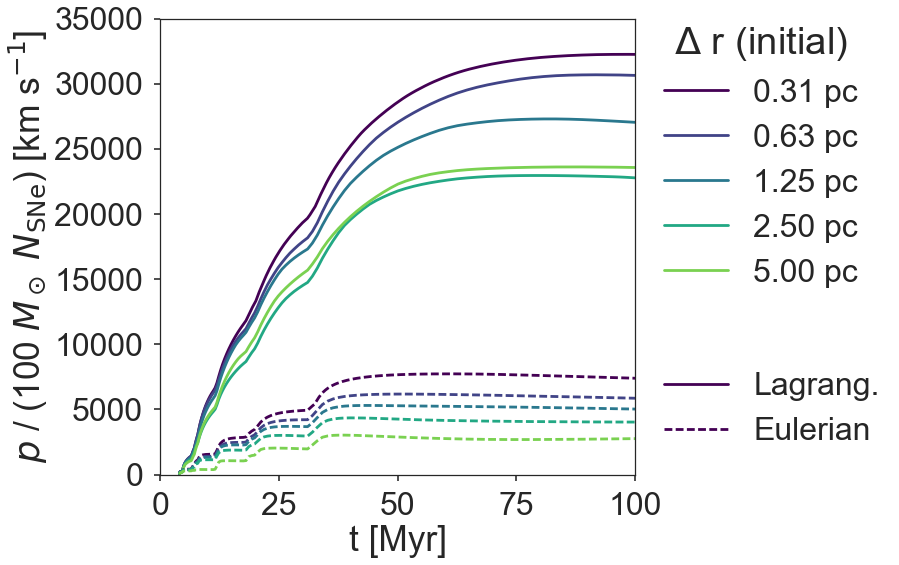

In [5]:
## First make the plot.
# Note that I'm setting `label=""` for the lines I don't want included
# in the more-standard (first) legend

for i, run_id in enumerate(run_ids):
    mask = (df.ids==run_id)
    
    if "moving" in run_id:
        # simulations that use *lagrangian* computational methods
        linestyle="solid"
        label="{:.2f} pc".format(resolutions[i])
    else:
        # simulations that use *eulerian* computational methods
        linestyle="dashed"
        label=""  # these are redundant -- already covered by the earlier lines
        
    i_color = i % num_colors # restart the colors 
    plt.plot(df.times[mask], df.momenta[mask],
             linestyle=linestyle,
             color=colors[i_color],
             label=label)
    
plt.xlim(xmin=0, xmax=100)
plt.ylim(ymin=0, ymax=35000)

plt.xlabel("t [Myr]")
plt.ylabel("$p$ / (100 $M_\odot$ $N_\mathrm{SNe}$) [km s$^{-1}$]")

### *** Now the interesting part of the legends begins

# The first half of the legend is relatively standard,
# except that I'm putting it outside the figure
#   - in this version it'll only add a legend for half the lines,
#     because I've set label="" for the other lines
#     but if you want to choose specific lines to include / exclude, see the next part
res_legend = plt.legend(
    title=r"$\Delta$ r (initial)", # give the legend an overall title
    loc="upper left", bbox_to_anchor=(1, 1.05), # choose legend location (outside figure)
)
ax = plt.gca()
# make sure to explicitly add the first legend to the axis
# or else it might get overwritten when we make the second legend
ax.add_artist(res_legend) 


# Now create the second half of the legend, in a different place
# This legend chooses specific lines, and gives them custom labels
res_legend = plt.legend(
    [ax.get_lines()[0],ax.get_lines()[num_colors]], # choose which lines to show
    ["Lagrang.", "Eulerian"], # give them custom labels
    loc="lower left", bbox_to_anchor=(1, 0), # choose legend location (outside figure)
)


### ***IMPORTANT***
# If you want to save this figure, and have the legend visible,
# you'll need to change the boundary of what gets saved.
# In this case, I've chosen the size by trial and error:
plt.tight_layout(rect=(0,0,.8, 1))

# Now you can go about saving your plot